<a href="https://colab.research.google.com/github/harikrishna099388/postgresql-task6/blob/main/Sale_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd
from datetime import datetime


In [2]:
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE online_sales (
    order_id INTEGER,
    order_date TEXT,
    amount REAL,
    product_id INTEGER
)
''')
sample_data = [
    (1, '2025-01-15', 200.00, 101),
    (2, '2025-01-20', 150.00, 102),
    (3, '2025-02-05', 300.00, 101),
    (4, '2025-02-15', 100.00, 103),
    (5, '2025-03-01', 250.00, 102),
    (6, '2025-03-22', 175.00, 101),
    (7, '2025-04-10', 225.00, 104),
    (8, '2025-04-18', 125.00, 105),
]
cursor.executemany("INSERT INTO online_sales VALUES (?, ?, ?, ?)", sample_data)
conn.commit()

In [4]:
query = """
SELECT
    strftime('%Y-%m', order_date) AS year_month,
    SUM(amount) AS total_revenue,
    COUNT(DISTINCT order_id) AS total_orders
FROM
    online_sales
GROUP BY
    year_month
ORDER BY
    year_month
"""


In [5]:
df_results = pd.read_sql_query(query, conn)
df_results


,year_month,total_revenue,total_orders
0,2025-01,350.0,2
1,2025-02,400.0,2
2,2025-03,425.0,2
3,2025-04,350.0,2


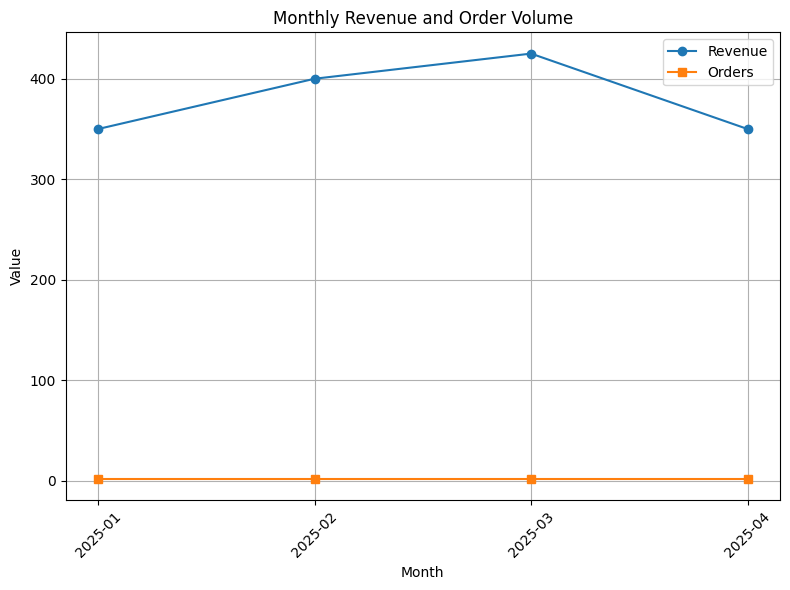

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(df_results['year_month'], df_results['total_revenue'], marker='o', label='Revenue')
plt.plot(df_results['year_month'], df_results['total_orders'], marker='s', label='Orders')
plt.title("Monthly Revenue and Order Volume")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df_results

,year_month,total_revenue,total_orders
0,2025-01,350.0,2
1,2025-02,400.0,2
2,2025-03,425.0,2
3,2025-04,350.0,2
